In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import fetch_openml

#Note: data has 3 classes
penguins = fetch_openml(name='penguins')

#load data and targets
data = penguins.data
targets = penguins.target

# create dataframe for penguins by concatenating data and targets
data_df = pd.DataFrame(data, columns=penguins.feature_names)
# display(data_df)
targets_df = pd.DataFrame(targets, columns=penguins.target_names)
penguins_df = pd.concat([data_df, targets_df],axis='columns')

# drop instances with NaN values
penguins_df.dropna(inplace=True, axis=0)
display(penguins_df)

#Seperate features and targets
X = penguins_df[penguins.feature_names]
y = penguins_df[penguins.target_names]

X.reset_index(drop=True, inplace = True)
y.reset_index(drop=True, inplace = True)
penguins

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,2.0,39.1,18.7,181.0,3750.0,2.0,Adelie
1,2.0,39.5,17.4,186.0,3800.0,1.0,Adelie
2,2.0,40.3,18.0,195.0,3250.0,1.0,Adelie
4,2.0,36.7,19.3,193.0,3450.0,1.0,Adelie
5,2.0,39.3,20.6,190.0,3650.0,2.0,Adelie
...,...,...,...,...,...,...,...
338,0.0,47.2,13.7,214.0,4925.0,1.0,Gentoo
340,0.0,46.8,14.3,215.0,4850.0,1.0,Gentoo
341,0.0,50.4,15.7,222.0,5750.0,2.0,Gentoo
342,0.0,45.2,14.8,212.0,5200.0,1.0,Gentoo


{'data': array([[2.00e+00, 3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 2.00e+00],
        [2.00e+00, 3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 1.00e+00],
        [2.00e+00, 4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 1.00e+00],
        ...,
        [0.00e+00, 5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03, 2.00e+00],
        [0.00e+00, 4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03, 1.00e+00],
        [0.00e+00, 4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03, 2.00e+00]]),
 'target': array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
        'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
        'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
        'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
        'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
        'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
        'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
        'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
   

In [124]:
#Encode discrete categorical values for Species
Y = y
Y = pd.get_dummies(Y)

Y

,species_Adelie,species_Chinstrap,species_Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
329,0,0,1
330,0,0,1
331,0,0,1
332,0,0,1


In [125]:
#Correlation matrix 

X.corr(method='pearson')

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
island,1.000000,-0.337009,0.568885,-0.555759,-0.560518,-0.020316
culmen_length_mm,-0.337009,1.000000,-0.228640,0.652126,0.589066,0.340377
culmen_depth_mm,0.568885,-0.228640,1.000000,-0.578730,-0.472987,0.360896
flipper_length_mm,-0.555759,0.652126,-0.578730,1.000000,0.873211,0.261430
body_mass_g,-0.560518,0.589066,-0.472987,0.873211,1.000000,0.426309
sex,-0.020316,0.340377,0.360896,0.261430,0.426309,1.000000


In [126]:
# import seaborn as sns
# sns.set()
# import matplotlib.pyplot as plt
# import os
# p=sns.pairplot(penguins_df, hue = 'species')

explained variance ratio (first two components): [0.54457115 0.24748359]


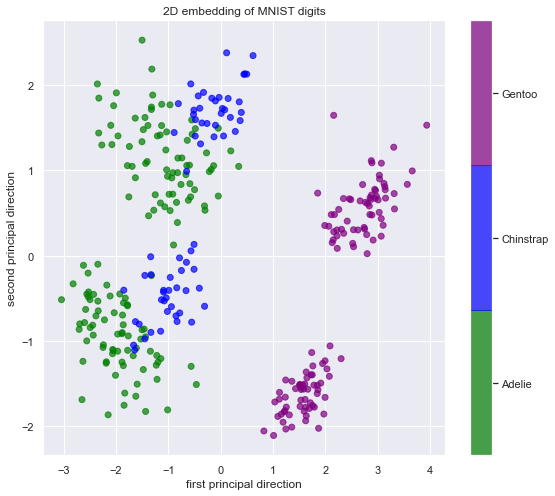

In [141]:
#PCA visualization of data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt


#standardize data
x = StandardScaler().fit_transform(X)

#apply PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(x)

print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

# principalDf = pd.DataFrame(data = pcs
#              , columns = ['principal component 1', 'principal component 2'])

#concat with targets (characteristic labels not encoded values)
# pca_df = pd.concat([principalDf, y], axis = 1)

#encode classes for plotting
labels = np.ravel(y)
le = preprocessing.LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
colors = ['green','blue','purple']

fig = plt.figure(figsize=(9,8))

plt.scatter(pcs[:,0], pcs[:,1], c=labels, cmap=matplotlib.colors.ListedColormap(colors),  alpha=.7)             # plot them  
plt.xlabel("first principal direction")
plt.ylabel("second principal direction")
plt.title("2D embedding of MNIST digits")

cb = plt.colorbar()
loc = np.arange(0,max(labels),max(labels)/float(len(colors)))+1/3
cb.set_ticks(loc)
cb.set_ticklabels(penguins_df['species'].unique())

plt.show()
fig.savefig('pca_penguins.png')

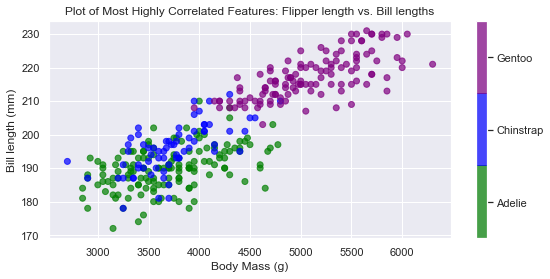

In [151]:
fig = plt.figure(figsize=(9,4))


plt.scatter(X['body_mass_g'], X['flipper_length_mm'], c=labels, cmap=matplotlib.colors.ListedColormap(colors),  alpha=.7)             # plot them  
plt.xlabel("Body Mass (g)")
plt.ylabel("Bill length (mm)")
plt.title("Plot of Most Highly Correlated Features: Flipper length vs. Bill lengths")

cb = plt.colorbar()
loc = np.arange(0,max(labels),max(labels)/float(len(colors)))+.33
cb.set_ticks(loc)
cb.set_ticklabels(penguins_df['species'].unique())

plt.show()
fig.savefig('flippers_and_bills.png')

In [128]:
#2 classes:
credit = fetch_openml(name='credit-g')

data = credit.data
targets = credit.target

credit

# create dataframe for penguins by concatenating data and targets
data_df = pd.DataFrame(data, columns=credit.feature_names)
display(data_df)
targets_df = pd.DataFrame(targets, columns=credit.target_names)
credit_df = pd.concat([data_df, targets_df],axis='columns')

# drop instances with NaN values
credit_df.dropna(inplace=True, axis=0)
display(credit_df)

#Seperate features and targets
X1 = credit_df[credit.feature_names]
y1 = credit_df[credit.target_names]

X1

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,0.0,6.0,4.0,3.0,1169.0,4.0,4.0,4.0,2.0,0.0,4.0,0.0,67.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0
1,1.0,48.0,2.0,3.0,5951.0,0.0,2.0,2.0,1.0,0.0,2.0,0.0,22.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0
2,3.0,12.0,4.0,6.0,2096.0,0.0,3.0,2.0,2.0,0.0,3.0,0.0,49.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0
3,0.0,42.0,2.0,2.0,7882.0,0.0,3.0,2.0,2.0,2.0,4.0,1.0,45.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0
4,0.0,24.0,3.0,0.0,4870.0,0.0,2.0,3.0,2.0,0.0,4.0,3.0,53.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,12.0,2.0,2.0,1736.0,0.0,3.0,3.0,1.0,0.0,4.0,0.0,31.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0
996,0.0,30.0,2.0,1.0,3857.0,0.0,2.0,4.0,0.0,0.0,4.0,1.0,40.0,2.0,1.0,1.0,3.0,1.0,1.0,0.0
997,3.0,12.0,2.0,3.0,804.0,0.0,4.0,4.0,2.0,0.0,4.0,2.0,38.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0
998,0.0,45.0,2.0,3.0,1845.0,0.0,2.0,4.0,2.0,0.0,4.0,3.0,23.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0.0,6.0,4.0,3.0,1169.0,4.0,4.0,4.0,2.0,0.0,...,0.0,67.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,good
1,1.0,48.0,2.0,3.0,5951.0,0.0,2.0,2.0,1.0,0.0,...,0.0,22.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,bad
2,3.0,12.0,4.0,6.0,2096.0,0.0,3.0,2.0,2.0,0.0,...,0.0,49.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,good
3,0.0,42.0,2.0,2.0,7882.0,0.0,3.0,2.0,2.0,2.0,...,1.0,45.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0,good
4,0.0,24.0,3.0,0.0,4870.0,0.0,2.0,3.0,2.0,0.0,...,3.0,53.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,12.0,2.0,2.0,1736.0,0.0,3.0,3.0,1.0,0.0,...,0.0,31.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,good
996,0.0,30.0,2.0,1.0,3857.0,0.0,2.0,4.0,0.0,0.0,...,1.0,40.0,2.0,1.0,1.0,3.0,1.0,1.0,0.0,good
997,3.0,12.0,2.0,3.0,804.0,0.0,4.0,4.0,2.0,0.0,...,2.0,38.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,good
998,0.0,45.0,2.0,3.0,1845.0,0.0,2.0,4.0,2.0,0.0,...,3.0,23.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0,bad


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,0.0,6.0,4.0,3.0,1169.0,4.0,4.0,4.0,2.0,0.0,4.0,0.0,67.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0
1,1.0,48.0,2.0,3.0,5951.0,0.0,2.0,2.0,1.0,0.0,2.0,0.0,22.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0
2,3.0,12.0,4.0,6.0,2096.0,0.0,3.0,2.0,2.0,0.0,3.0,0.0,49.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0
3,0.0,42.0,2.0,2.0,7882.0,0.0,3.0,2.0,2.0,2.0,4.0,1.0,45.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0
4,0.0,24.0,3.0,0.0,4870.0,0.0,2.0,3.0,2.0,0.0,4.0,3.0,53.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,12.0,2.0,2.0,1736.0,0.0,3.0,3.0,1.0,0.0,4.0,0.0,31.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0
996,0.0,30.0,2.0,1.0,3857.0,0.0,2.0,4.0,0.0,0.0,4.0,1.0,40.0,2.0,1.0,1.0,3.0,1.0,1.0,0.0
997,3.0,12.0,2.0,3.0,804.0,0.0,4.0,4.0,2.0,0.0,4.0,2.0,38.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0
998,0.0,45.0,2.0,3.0,1845.0,0.0,2.0,4.0,2.0,0.0,4.0,3.0,23.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0


In [129]:
#4 classes
vehicle = fetch_openml(name='vehicle', version = 1)

data = vehicle.data
targets = vehicle.target


# create dataframe for penguins by concatenating data and targets
data_df = pd.DataFrame(data, columns=vehicle.feature_names)
display(data_df)
targets_df = pd.DataFrame(targets, columns=vehicle.target_names)
vehicle_df = pd.concat([data_df, targets_df],axis='columns')

# drop instances with NaN values
vehicle_df.dropna(inplace=True, axis=0)
display(vehicle_df)

#Seperate features and targets
X2 = vehicle_df[vehicle.feature_names]
y2 = vehicle_df[vehicle.target_names]

X2

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0
842,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0
843,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,25.0,173.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201.0
844,86.0,36.0,78.0,146.0,58.0,7.0,135.0,50.0,18.0,124.0,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195.0


,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0,saab
842,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0,van
843,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,25.0,173.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201.0,saab
844,86.0,36.0,78.0,146.0,58.0,7.0,135.0,50.0,18.0,124.0,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195.0,saab


,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0
842,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0
843,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,25.0,173.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201.0
844,86.0,36.0,78.0,146.0,58.0,7.0,135.0,50.0,18.0,124.0,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195.0
